Compare the fan engagement level between a team and its players. What are the factors that
establishes deeper connect with the fan? How to influence a player fan to become the team fan?
Analyze the sentiment pre‐season, mid‐season, and post‐season for a sport league, e.g. IPL.
Data source
 Social handles of teams, players, and associated celebrities.
 League and Franchise websites.
 Sports Magazines.
 Sports Channels website for performance, live comments, etc.


In [94]:
import os
import sys
from tweepy import API
from tweepy import OAuthHandler
import json
from collections import Counter
import pandas as pd
import requests
import numpy as np

In [2]:
#This function is responsible for authentication. Imported keys from os variables
def get_twitter_auth():
    """Setup Twitter authentication.

    Return: tweepy.OAuthHandler object
    """
    try:
        consumer_key = 'gPT7A0IUan7SvvnLVpftKXCEY'
        consumer_secret = 'nQPITu0uvgU0nTG2GHdfEmfSAsEQ9rHWM0gTDiwyQ5758fJQQS'
        access_token = '796391720623566848-d0D8oHjufe3BBYnLr8O8jvYcA34bwlS'
        access_secret = 'LHE29SzvndMaLLFlJsLrXmp8nS3x63ndQ4XsOAZe47FLK'
    except KeyError:
        sys.stderr.write("TWITTER_* environment variables not set\n")
        sys.exit(1)    
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    return auth

In [3]:
#used to create instance of tweepy.api
def get_twitter_client():
    """Setup Twitter API client.

    Return: tweepy.API object
    """
    auth = get_twitter_auth()
    #client = API(auth)
    client = API(auth, wait_on_rate_limit=True)
    return client

In [12]:
from tweepy import Cursor

client = get_twitter_client()
#for status in Cursor(client.home_timeline).items(10):
#    print(status.text) --> status variable is instance of tweepy.status used by tweepy to wrap statuses & text is attributes

with open('timeline_SRH_0612_post.jsonl', 'w') as f:
    #for page in Cursor(client.timeline_ipl_0520, count=10).pages(4):
    for page in Cursor(client.search, q= "#SRH", count=3000, language = "en").pages(8):
        for status in page:
            f.write(json.dumps(status._json)+"\n")

In [49]:
fname = "C:\\Users\\arun\\Desktop\\Tweets\\output.jsonl" # extracts tweets json file path
tweet = pd.read_json(fname, lines=True)
tweet.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,None,2018-05-20 16:41:10,"{'hashtags': [{'text': 'KXIP', 'indices': [18,...",NaN,0,False,None,998242238504341511,998242238504341504,...,NaN,NaN,NaN,5,False,{'created_at': 'Sun May 20 16:37:26 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @SirJadejaaaa: #KXIP Needs To Bowl Out Chen...,False,"{'id': 85234910, 'id_str': '85234910', 'name':..."
1,NaN,None,2018-05-20 16:41:08,"{'hashtags': [{'text': 'CSK', 'indices': [19, ...","{'media': [{'id': 998211035759656962, 'id_str'...",0,False,None,998242228756606976,998242228756606976,...,NaN,NaN,NaN,100,False,{'created_at': 'Sun May 20 14:37:37 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @VickyVjAddict: #CSK பீ லைக் 😂😂\nDon't ever...,False,"{'id': 384797380, 'id_str': '384797380', 'name..."
2,NaN,None,2018-05-20 16:40:55,"{'hashtags': [{'text': 'CSKvKXIP', 'indices': ...",NaN,0,False,None,998242175447019521,998242175447019520,...,NaN,NaN,NaN,0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Kholi, Rahul, Rayudu all got out for a single ...",False,"{'id': 317727195, 'id_str': '317727195', 'name..."
3,NaN,None,2018-05-20 16:40:50,"{'hashtags': [{'text': 'KXIP', 'indices': [16,...",NaN,0,False,None,998242154307698689,998242154307698688,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Dream Start for #KXIP in their defense of #CSK...,True,"{'id': 107927058, 'id_str': '107927058', 'name..."
4,NaN,None,2018-05-20 16:40:47,"{'hashtags': [{'text': 'KXIP', 'indices': [18,...",NaN,0,False,None,998242139078209537,998242139078209536,...,NaN,NaN,NaN,5,False,{'created_at': 'Sun May 20 16:37:26 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @SirJadejaaaa: #KXIP Needs To Bowl Out Chen...,False,"{'id': 4055482648, 'id_str': '4055482648', 'na..."


In [118]:
import glob
from tweepy import Cursor
jsonfile  = glob.glob('C:\\Users\\arun\\Desktop\\Tweets\\FB\\*.jsonl')
#writejson = json.dumps('C:\\Users\\arun\\Desktop\\Tweets\\output.jsonl', 'wb')
tweets = []
for files in jsonfile:
    with open(files, 'r') as f:
        for line in f:
            tweets.append(json.loads(line))
outfile = open('C:\\Users\\arun\\Desktop\\Tweets\\FB.jsonl', 'w')
for tweet in tweets:
    outfile.write(json.dumps(tweet) + '\n')

In [11]:
#with open('C:\\Users\\arun\\Desktop\\Tweets\\output.jsonl', 'w') as f:
 #   f.write(json.dumps(tweets,indent=3, sort_keys=True))

In [95]:
#Extracting list of hastags & its count from user timeline
from collections import Counter
def get_hashtags(tweet):
    entities = tweet.get('entities', {}) #from tweets find entities & extract it
    hashtags = entities.get('hashtags', []) #from entities find hastags & extract it
    return [tag['text'].lower() for tag in hashtags] #convert as lower case and return back

fname = "C:\\Users\\arun\\Desktop\\Tweets\\output1.jsonl" # extracts tweets json file path
with open(fname, 'r') as f:
    hashtags = Counter() #is a dictionary used to count hashable objects
    for line in f: #Reads each line at a time
        tweet = json.loads(line) 
        hashtags_in_tweet = get_hashtags(tweet) #calling get_hastags function to get list of hastags
        hashtags.update(hashtags_in_tweet)
    for tag, count in hashtags.most_common(20): #most_common is used to order keys based on values
        print("{}: {}".format(tag, count))


csk: 2196
ipl2018: 2001
kkr: 1985
ipl: 1712
srh: 1633
delhidaredevils: 1282
mi: 1146
mumbaiindians: 1098
rcb: 1061
rr: 695
ddvmi: 590
kingsxi: 579
whistlepodu: 508
cskvkxip: 440
vivoipl: 438
kxip: 390
lloydhappinessmeter: 342
dd: 268
khushiyanonkaro: 264
yellove: 248


In [3]:
from collections import defaultdict
fname = "C:\\Users\\arun\\Desktop\\Tweets\\output1.jsonl"
with open(fname, 'r') as f:
    hashtag_count = defaultdict(int)
    for line in f:
        tweet = json.loads(line)
        hashtags_in_tweet = get_hashtags(tweet)
        n_of_hashtags = len(hashtags_in_tweet)
        hashtag_count[n_of_hashtags] += 1
    tweets_with_hashtags = sum([count for n_of_tags, count in hashtag_count.items() if n_of_tags > 0])
    tweets_no_hashtags = hashtag_count[0]
    tweets_total = tweets_no_hashtags + tweets_with_hashtags
    tweets_with_hashtags_percent = "%.2f" % (tweets_with_hashtags / tweets_total * 100)
    tweets_no_hashtags_percent = "%.2f" % (tweets_no_hashtags / tweets_total * 100)
    print("{} tweets without hashtags({}%)".format(tweets_no_hashtags,tweets_no_hashtags_percent))
    print("{} tweets with at least one hashtag({}%)".format(tweets_with_hashtags,tweets_with_hashtags_percent))
    for tag_count, tweet_count in hashtag_count.items():
        if tag_count > 0:
            percent_total = "%.2f" % (tweet_count / tweets_total * 100)
            percent_elite = "%.2f" % (tweet_count / tweets_with_hashtags * 100)
            print("{} tweets with {} hashtags ({}% total, {}% elite)".format(tweet_count, tag_count,percent_total, percent_elite))

1921 tweets without hashtags(16.71%)
9577 tweets with at least one hashtag(83.29%)
1996 tweets with 3 hashtags (17.36% total, 20.84% elite)
2432 tweets with 1 hashtags (21.15% total, 25.39% elite)
1363 tweets with 4 hashtags (11.85% total, 14.23% elite)
1943 tweets with 2 hashtags (16.90% total, 20.29% elite)
27 tweets with 11 hashtags (0.23% total, 0.28% elite)
310 tweets with 7 hashtags (2.70% total, 3.24% elite)
653 tweets with 5 hashtags (5.68% total, 6.82% elite)
209 tweets with 8 hashtags (1.82% total, 2.18% elite)
304 tweets with 6 hashtags (2.64% total, 3.17% elite)
100 tweets with 9 hashtags (0.87% total, 1.04% elite)
25 tweets with 12 hashtags (0.22% total, 0.26% elite)
187 tweets with 10 hashtags (1.63% total, 1.95% elite)
9 tweets with 13 hashtags (0.08% total, 0.09% elite)
2 tweets with 14 hashtags (0.02% total, 0.02% elite)
1 tweets with 15 hashtags (0.01% total, 0.01% elite)
2 tweets with 19 hashtags (0.02% total, 0.02% elite)
4 tweets with 18 hashtags (0.03% total, 0.04

In [96]:
import string
from collections import Counter
from nltk.tokenize import TweetTokenizer #specially to handle tweets into documents
from nltk.corpus import stopwords # to remove stop words like is, was etc...
import nltk
nltk.download('stopwords')
from nltk.corpus import wordnet
from textblob import TextBlob

def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    text = text.lower() # for normalization
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if not tok in stopwords and not tok.isdigit()]

fname = "C:\\Users\\arun\\Desktop\\Tweets\\output1.jsonl"
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt','via', '...']
tf = Counter()
with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        #tweet1 = TextBlob(str(tweet))
        #if TextBlob.detect_language(tweet1) == 'en':
        tokens = process(text=tweet['text'],tokenizer=tweet_tokenizer,stopwords=stopword_list)
        tf.update(tokens)
    for tag, count in tf.most_common(50):
        print("{}: {}".format(tag, count))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
…: 6368
ा: 3160
்: 3119
#csk: 2193
्: 2013
#ipl2018: 2006
#kkr: 1938
े: 1901
#ipl: 1707
#srh: 1600
ी: 1376
क: 1344
#delhidaredevils: 1281
ு: 1184
#mi: 1137
ி: 1132
न: 1106
ि: 1102
#mumbaiindians: 1098
win: 1083
#rcb: 1060
team: 1057
க: 945
ா: 938
म: 886
😂: 885
ह: 876
ं: 860
ो: 814
ु: 779
स: 765
र: 751
match: 737
ल: 731
..: 697
#rr: 693
த: 652
vs: 647
ட: 643
प: 593
#ddvmi: 589
य: 576
@mipaltan: 574
ப: 563
one: 543
ै: 542
fans: 518
ipl: 516
@bhogleharsha: 516
#whistlepodu: 508


In [97]:
import nltk
import re
import string
from pprint import pprint
from nltk.corpus import wordnet

def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens

def remove_characters_before_tokenization(sentence):
    PATTERN = r'[^a-zA-Z0-9 ]'
    filtered_sentence = re.sub(PATTERN, r'', sentence)
    return filtered_sentence

def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return(old_word)
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
    
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens
    

fname = "C:\\Users\\arun\\Desktop\\Tweets\\output1.jsonl"
tf = []
corpus_text = []
with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        text = remove_characters_before_tokenization(tweet['text'])
        text = text.lower()
        corpus_text.append(text)
        token_list = tokenize_text(text)
        filtered_tokens = [remove_stopwords(tokens) for tokens in token_list]
        correct_tokens = [remove_repeated_characters(tokens) for tokens in filtered_tokens]
        tf.append(correct_tokens)
tokens  = [val for sublist in tf for val in sublist]
tokens = [val for sublist in tokens for val in sublist]
tokens

['rt',
 'sirjadeja',
 'kxip',
 'needs',
 'bowl',
 'chennai',
 'super',
 'kings',
 '100',
 'runs',
 'want',
 'qualify',
 'playofsin',
 'short',
 'srh',
 'csk',
 'rt',
 'vickyvjadict',
 'csk',
 'dont',
 'ever',
 'celebrate',
 'early',
 'haters',
 'htpstcow9etck9skn',
 'kholi',
 'rahul',
 'rayudu',
 'got',
 'single',
 'digit',
 'first',
 'time',
 'ipl2018',
 '14th',
 'match',
 'cskvkxip',
 'kholi',
 'klrahul',
 'csk',
 'dream',
 'start',
 'kxip',
 'defense',
 'csk',
 'less',
 '100',
 'dangerous',
 'inform',
 'rayudu',
 'departs',
 'wo',
 'htpstcosgwrqifxw',
 'rt',
 'sirjadeja',
 'kxip',
 'needs',
 'bowl',
 'chennai',
 'super',
 'kings',
 '100',
 'runs',
 'want',
 'qualify',
 'playofsin',
 'short',
 'srh',
 'csk',
 'htpstcotbxrito6yc',
 'csk',
 'ipl2018',
 'rt',
 'jegathismind',
 'final',
 'without',
 'csk',
 'rt',
 'starsportsindia',
 'kxip',
 'csk',
 'bestvsbest',
 'rt',
 'starsportsindia',
 'csk',
 'rt',
 'davidwiley',
 'game',
 'day',
 'massive',
 'last',
 'game',
 'us',
 'denawayfromd

In [4]:
import nltk
nltk.download('universal_tagset')
import nltk.stem.lancaster as lan_stem
import nltk.stem
wordnet_lemm = nltk.stem.WordNetLemmatizer()

tokens_tagged = nltk.pos_tag(tokens, tagset='universal')
import pandas as pd
labels = ['Token','POS Tag']

tokens_df = pd.DataFrame.from_records(tokens_tagged, columns = labels)
#tokens_df[:5]
stem1 = lan_stem.LancasterStemmer()
newlist=[]
for token1 in tokens_df.Token:
    newlist.append(stem1.stem(token1))

stemmed_df = pd.DataFrame({'stemmed_token':newlist})
tokens_stemmed_df = pd.concat([tokens_df, stemmed_df], axis=1)
#tokens_stemmed_df[:19]

lemm_list=[]
for token1 in tokens_df.Token:
    lemm_list.append(wordnet_lemm.lemmatize(token1))
    
lemmed_df = pd.DataFrame({'lemmed_token':lemm_list})
tokens_lemmed_df = pd.concat([tokens_stemmed_df, lemmed_df], axis=1)
tokens_lemmed_df[:25]

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\arun\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


,Token,POS Tag,stemmed_token,lemmed_token
0,rt,NOUN,rt,rt
1,sirjadeja,NOUN,sirjadej,sirjadeja
2,kxip,NOUN,kxip,kxip
3,needs,VERB,nee,need
4,bowl,ADJ,bowl,bowl
5,chennai,NOUN,chenna,chennai
6,super,ADJ,sup,super
7,kings,NOUN,king,king
8,100,NUM,100,100
9,runs,NOUN,run,run


In [18]:
#Feature Extraction using Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

def bow_extractor(corpus, ngram_range=(1,2)):
    vectorizer = CountVectorizer(min_df=100, ngram_range=ngram_range, analyzer='word')
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

bow_vectorizer, bow_features = bow_extractor(tokens)
features = bow_features.todense()
#print(features)

new_doc_features = bow_vectorizer.transform(tokens)
new_doc_features = new_doc_features.todense()
#print(new_doc_features)


feature_names = bow_vectorizer.get_feature_names()
print(feature_names)


['10', '11', '2018', 'abdevil', 'abdeviliers17', 'ai', 'already', 'alway', 'always', 'amp', 'appreciate', 'arrival', 'back', 'balls', 'beat', 'behind', 'believe', 'best', 'bhogleharsha', 'bhuvioficial', 'bowling', 'campaign', 'cant', 'captain', 'ceptainamerica', 'champions', 'chenaipl', 'chennai', 'come', 'complete', 'concept', 'congrats', 'contest', 'cricbuz', 'cricket', 'cricketakash', 'cricketmerijan', 'csk', 'cskfansoficial', 'cskvkxip', 'cup', 'cybersecurity', 'datascience', 'day', 'dd', 'dearbinod', 'delhi', 'delhidaredevils', 'descent', 'dhoni', 'dildili', 'disappointed', 'dl', 'dont', 'dvmi', 'either', 'eliminator', 'end', 'endeavours', 'ever', 'expect', 'fans', 'fightback', 'final', 'finals', 'fintech', 'first', 'forget', 'fought', 'future', 'gambhir', 'game', 'gave', 'get', 'giving', 'go', 'going', 'good', 'got', 'great', 'happy', 'hard', 'helm', 'hes', 'highest', 'hima', 'hit', 'hitting', 'home', 'hope', 'htpstcoytucpweto', 'hurtling', 'hyderabad', 'imagine', 'imvkohli', 'in

In [98]:
import pandas as pd
df = pd.DataFrame(data=features, columns = feature_names)
print(df)


from sklearn.feature_extraction.text import TfidfTransformer

def tfidf_transformer(bow_matrix):
    transformer = TfidfTransformer(norm='l2',smooth_idf=True,use_idf=True)
    tfidf_matrix = transformer.fit_transform(bow_matrix)
    return transformer, tfidf_matrix

feature_names = bow_vectorizer.get_feature_names()
tfidf_trans, tdidf_features = tfidf_transformer(bow_features)
features = np.round(tdidf_features.todense(), 2)
display_features(features, feature_names)

nd_tfidf = tfidf_trans.transform(new_doc_features)
nd_features = np.round(nd_tfidf.todense(), 2)
display_features(nd_features, feature_names)

        10  11  2018  abdevil  abdeviliers17  ai  already  alway  always  amp  \
0        0   0     0        0              0   0        0      0       0    0   
1        0   0     0        0              0   0        0      0       0    0   
2        0   0     0        0              0   0        0      0       0    0   
3        0   0     0        0              0   0        0      0       0    0   
4        0   0     0        0              0   0        0      0       0    0   
5        0   0     0        0              0   0        0      0       0    0   
6        0   0     0        0              0   0        0      0       0    0   
7        0   0     0        0              0   0        0      0       0    0   
8        0   0     0        0              0   0        0      0       0    0   
9        0   0     0        0              0   0        0      0       0    0   
10       0   0     0        0              0   0        0      0       0    0   
11       0   0     0        

NameError: name 'display_features' is not defined

In [141]:
#Text Summarization
import normalization as nm
from scipy.sparse.linalg import svds
from operator import itemgetter

def compute_ngrams(sequence, n):
    return zip(*[sequence[index:] 
                 for index in range(n)])


def get_top_ngrams(corpus, ngram_val=1, limit=5):
    ngrams = compute_ngrams(tokens, ngram_val)
    ngrams_freq_dist = nltk.FreqDist(ngrams)
    sorted_ngrams_fd = sorted(ngrams_freq_dist.items(),key=itemgetter(1), reverse=True)
    sorted_ngrams = sorted_ngrams_fd[0:limit]
    sorted_ngrams = [(' '.join(text), freq) for text, freq in sorted_ngrams]
    return sorted_ngrams

get_top_ngrams(corpus=tokens, ngram_val=3,limit=20)



[('ml ai iot', 223),
 ('ai iot cybersecurity', 221),
 ('iot cybersecurity marketing', 221),
 ('ready machine intelligence', 211),
 ('right one forget', 192),
 ('one forget kingsxi', 192),
 ('rt bhogleharsha right', 189),
 ('bhogleharsha right one', 189),
 ('mi ml ai', 187),
 ('really believe concept', 186),
 ('believe concept either', 186),
 ('concept either win', 186),
 ('either win learn', 186),
 ('win learn fought', 186),
 ('learn fought hard', 186),
 ('fought hard gave', 186),
 ('hard gave one', 186),
 ('gave one thing', 186),
 ('rt imvkohli really', 185),
 ('imvkohli really believe', 185)]

In [122]:
from nltk.probability import FreqDist
freq = FreqDist(tokens)
#freq

from heapq import nlargest
nlargest(20, freq, key=freq.get)

from collections import defaultdict
ranking = defaultdict(int)

for i, sent in enumerate(corpus_text):
    for w in nltk.word_tokenize(sent.lower()):
        if w in freq:
            ranking[i] += freq[w]
#ranking

sents_idx = nlargest(20, ranking, key=ranking.get)
[corpus_text[j] for j in sorted(sents_idx)]

['rt cskiplteam csk into the ipl finals  rt if you are waiting for this moment ipl ipl2018 srhvcsk csk iplfinal httpstcojfx7',
 'rt cskiplteam csk into the ipl finals  rt if you are waiting for this moment ipl ipl2018 srhvcsk csk iplfinal httpstcojfx7',
 'rt cskiplteam csk into the ipl finals  rt if you are waiting for this moment ipl ipl2018 srhvcsk csk iplfinal httpstcojfx7',
 'rt cskiplteam csk into the ipl finals  rt if you are waiting for this moment ipl ipl2018 srhvcsk csk iplfinal httpstcojfx7',
 'rt cskiplteam csk into the ipl finals  rt if you are waiting for this moment ipl ipl2018 srhvcsk csk iplfinal httpstcojfx7',
 'rt dosraparera if srh wins today i want csk to lose in final and srh lifts ipl2018but if srh loses today i want csk to win final and',
 'rt dosraparera if srh wins today i want csk to lose in final and srh lifts ipl2018but if srh loses today i want csk to win final and',
 'rt dosraparera if srh wins today i want csk to lose in final and srh lifts ipl2018but if 

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')

x= vectorizer.fit_transform(corpus_text)

from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, init = 'k-means++', max_iter=100, n_init=1, verbose=True)
km.fit(x)

Initialization complete
Iteration  0, inertia 21650.476
Iteration  1, inertia 11052.483
Iteration  2, inertia 11033.669
Iteration  3, inertia 11029.114
Iteration  4, inertia 11027.659
Iteration  5, inertia 11026.197
Iteration  6, inertia 11025.442
Iteration  7, inertia 11025.309
Iteration  8, inertia 11024.729
Iteration  9, inertia 11024.540
Iteration 10, inertia 11024.466
Iteration 11, inertia 11024.374
Iteration 12, inertia 11024.062
Iteration 13, inertia 11024.032
Iteration 14, inertia 11024.019
Iteration 15, inertia 11024.007
Iteration 16, inertia 11023.996
Iteration 17, inertia 11023.981
Iteration 18, inertia 11023.700
Iteration 19, inertia 11021.127
Iteration 20, inertia 11019.408
Iteration 21, inertia 11018.568
Iteration 22, inertia 11018.512
Iteration 23, inertia 11018.495
Iteration 24, inertia 11018.490
Iteration 25, inertia 11018.489
Iteration 26, inertia 11018.488
Converged at iteration 26: center shift 0.000000e+00 within tolerance 1.537230e-08


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)

In [134]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([6618, 1966,  223, 2691], dtype=int64))

In [136]:
text = {}
for i, cluster in enumerate(km.labels_):
    oneDocument  = corpus_text[i]
    if cluster not in text.keys():
        text[cluster] = oneDocument
    else:
        text[cluster] += oneDocument

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import defaultdict
from string import punctuation
from heapq import nlargest
import nltk

_stopwords = set(stopwords.words('english') + list(punctuation))

keywords ={}
counts = {}
for cluster in range(4):
    word_sent = word_tokenize(text[cluster].lower())
    word_sent = (word for word in word_sent if word not in _stopwords)
    freq = FreqDist(word_sent)
    keywords[cluster] = nlargest(10, freq, key= freq.get)
    counts[cluster] = freq

unique_keys = {}
for cluster in range(4):
    other_clusters = list(set(range(10))-set([cluster]))
    keys_other_clusters = set(keywords[other_clusters[0]]).union(set(keywords[other_clusters[1]]))
    unique = set(keywords[cluster])-keys_other_clusters
    unique_keys[cluster] = nlargest(10, unique, key= counts[cluster].get)

unique_keys

{0: ['rcb', 'delhidaredevils', 'mumbaiindians', 'mipaltan', 'one'],
 1: ['ipl', 'vs', 'cricket', 'team', '2', 'rr'],
 2: ['iot',
  'marketing',
  'ai',
  'ml',
  'cybersecurity',
  'machine',
  'ready',
  'intelligence',
  'datascience'],
 3: ['srh', 'match', 'us', 'chennaiipl']}

Text(0,0.5,'Frequency')

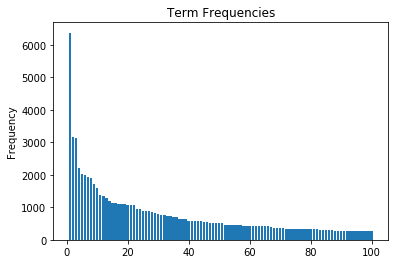

In [14]:
import matplotlib.pyplot as plt
y = [count for tag, count in tf.most_common(100)]
x = range(1, len(y)+1)
plt.bar(x, y)
plt.title("Term Frequencies")
plt.ylabel("Frequency")

C:\Users\arun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


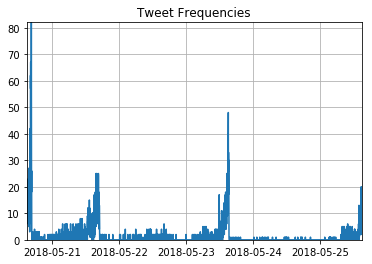

In [15]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import pickle

fname = "C:\\Users\\arun\\Desktop\\Tweets\\output1.jsonl"
with open(fname, 'r') as f:
    all_dates = []
    for line in f:
        tweet = json.loads(line)
        all_dates.append(tweet.get('created_at'))
idx = pd.DatetimeIndex(all_dates)
ones = np.ones(len(all_dates))
my_series = pd.Series(ones, index=idx)
per_minute = my_series.resample('1Min', how='sum').fillna(0)
    
fig, ax = plt.subplots()
ax.grid(True)
ax.set_title("Tweet Frequencies")
hours = mdates.MinuteLocator(interval=60)
date_formatter = mdates.DateFormatter('%H:%M')
    
datemin = datetime(2018, 5, 20, 15, 0)
datemax = datetime(2018, 5, 25, 15, 0)

ax.set_xlim(datemin, datemax)
max_freq = per_minute.max()
ax.set_ylim(0, max_freq)
ax.plot(per_minute.index, per_minute)


In [140]:
from operator import itemgetter
import networkx as nx

fname = "C:\\Users\\arun\\Desktop\\Tweets\\output1.jsonl"
with open(fname) as f:
    graph = nx.DiGraph() #initializing empty directed graph with DiGraph() function
    for line in f:
        tweet = json.loads(line) #pass each tweet at a time
        if 'id' in tweet:
            graph.add_node(tweet['id'],          # Create a node for each tweet using add_note() function, node id is mandatory
                            tweet=tweet['text'], #included optional arguments like tweet, author name, created time
                            author=tweet['user']['screen_name'],
                            created_at=tweet['created_at'])
            if tweet['in_reply_to_status_id']: #check each node i.e each tweet was posted in reply to another tweet or not
                reply_to = tweet['in_reply_to_status_id'] #if it is reply tweet then we need to add edge instead of node
                if tweet['in_reply_to_status_id'] in graph and tweet['user']['screen_name'] != graph.node[reply_to]['author']:
                    graph.add_edge(tweet['in_reply_to_status_id'], tweet['id']) #creating edge using add_edge() func
    
    print(nx.info(graph)) #Print basin information about the graph which we created above

    sorted_replied = sorted(graph.degree(), key=itemgetter(1), reverse=True) # degree() will find no of indegree for each node
    most_replied_id, replies = sorted_replied[0] # after arranging in desc, take the 1st node which has more of of degree
    print("Most replied tweet ({} replies):".format(replies))
    print(graph.node[most_replied_id])

    print("Longest discussion:")
    longest_path = nx.dag_longest_path(graph) # dag_longest_path returns the node with longest no of reply
    for tweet_id in longest_path:
        node = graph.node[tweet_id]
        print("{} (by {} at {})".format(node['tweet'],
                                            node['author'],
                                            node['created_at']))

Name: 
Type: DiGraph
Number of nodes: 24795
Number of edges: 44
Average in degree:   0.0018
Average out degree:   0.0018
Most replied tweet (7 replies):
{'tweet': 'Which team will be facing #CSK on Sunday? Predict and stand chance to win Nippon Merchandise #YellowPoduWhistlePodu… https://t.co/UX6VxTCvmv', 'author': 'NipponIndia', 'created_at': 'Fri May 25 15:57:18 +0000 2018'}
Longest discussion:
Alantappudu asala cup ee kottani meerenti ikkada discussion 🤣🤣🤣 #RCB https://t.co/kHuyzjbv7c (by ynakg2 at Fri May 25 15:13:17 +0000 2018)
@ynakg2 apudo kotem ani chepukoni brathakakandi,  Ipude kodithe cheppandi miru kotla #RCB kotla  anthe (by Saiabhilash9 at Fri May 25 15:15:55 +0000 2018)
@Saiabhilash9 @ynakg2 Baabu assam lo anthey naa..season ki okarikeyy winner #RCB in Assam (by vinayreddy00001 at Fri May 25 15:18:50 +0000 2018)
@vinayreddy00001 @ynakg2 Apudu #RCB mi padi yedavakandi mundu ah 3-0 ni 3-1 ni cheyandi (by Saiabhilash9 at Fri May 25 15:30:09 +0000 2018)


In [116]:
#Plotting tweets in map using GeoJSON 

from argparse import ArgumentParser

fname = "C:\\Users\\arun\\Desktop\\Tweets\\output1.jsonl"
# Read tweet collection and build geo data structure
with open(fname, 'r') as f:
    geo_data = {
        "type": "FeatureCollection",
        "features": []
        }
    for line in f: # Extracting geographic information from a tweets and store as geojson object file
        tweet = json.loads(line)
        try:
            if tweet['coordinates']:
                geo_json_feature = {
                    "type": "Feature",
                    "geometry": {
                    "type": "Point",
                    "coordinates": tweet['coordinates']['coordinates']
                    },
                    "properties": {
                    "text": tweet['text'],
                    "created_at": tweet['created_at']
                    }
                    }
                geo_data['features'].append(geo_json_feature)
        except KeyError:
        # Skip if json doc is not a tweet (errors, etc.)
            continue
     
    # Save geo data
gname = "C:\\Users\\arun\\Desktop\\Tweets\\geo.jsonl"
with open(gname, 'w') as fout: #store the file
    fout.write(json.dumps(geo_data, indent=4))

In [113]:
#Finally mapping with Folium  --> allows to generate interactive maps with minimum effort
#it allows to interact geojson object with leaflet library

from argparse import ArgumentParser
import folium

gname = "C:\\Users\\arun\\Desktop\\Tweets\\geo.jsonl"
tname = "C:\\Users\\arun\\Desktop\\Tweets\\tweets.html"

tweet_map = folium.Map(location=[20.5937, 78.9629],zoom_start=5)
geojson_layer = folium.GeoJson(data=gname, name='geojson')
geojson_layer.add_to(tweet_map)
tweet_map.save(tname)


In [114]:
tweet_map

In [25]:
#https://developers.facebook.com/tools/explorer/
import requests

token = 'EAAJNXBRzn88BAEZCaOHGrLZBC9pkphK589TjkTZBx9LhfPl6AuN3EIMoXflG9AsnMBYazWGTYsvwbArjEL5EOgr2uknBJJcVdMiBKgdOiWeuYVZAsPaGjUT1RdEdKnMCWjWtv94rstIJuBrSypMx2QxkwueB8QKvDLKZArR7zGzHe4nCkPqS2O8VohZCsioasiTBH6RGOYJAZDZD'

graph = facebook.GraphAPI(token) #creating graph using token
posts = graph.get_connections('me', 'posts', fields='message,created_time,description,caption,link,place,status_type,shares')
while True:  # loop through pages
    try:
        with open('my_posts.jsonl', 'a') as f:
            for post in posts['data']:
                f.write(json.dumps(post)+"\n")
                # get next page
            posts = requests.get(posts['paging']['next']).json()
    except KeyError:
            # no more pages, break the loop
        break

In [37]:
import requests
import facebook
import json
import os

token = 'EAACEdEose0cBAKvRi8WX8ZB9O1OHc08Wn0hHIMZBneKHSysPR8RkCk0kP37phLqosMzZAWJZBfZA7pDpDSPy8XEiZA6nzkwAC8QZBZCmya5A3bKZBUM2VMUdNHMnPb7maVLpD6QLFImSyzkkc8tbbh1VfOrqlw42aBXXB7EZCwcn676nbEZCXkSZByajmnxsw3LoOehGTkRDFlkdZBAZDZD'
graph = facebook.GraphAPI(token)
all_fields = [
        'id',
        'message',
        'created_time',
        'shares',
        'likes.summary(true)',
        'comments.summary(true)'
    ]
all_fields = ','.join(all_fields)
name = "KolkataKnightRiders"
#TheChennaiSuperKings, IPL, sunrisershyderabad, mumbaiindians,RoyalChallengersBangalore,delhidaredevils,RajasthanRoyals,KingsXIPunjab, KolkataKnightRiders
posts = graph.get_connections(name, 'posts', fields=all_fields) #surfing facebook pages
    
downloaded = 0
while True:  # keep paginating
    if downloaded >= 100: #get only 1000 posts
        break
    try:
        fname = "0612_posts_{}.jsonl".format(name)
        with open(fname, 'a') as f:
            for post in posts['data']:
                downloaded += 1
                f.write(json.dumps(post)+"\n")
                # get next page
            posts = requests.get(posts['paging']['next']).json() #loop through next
    except KeyError:
            # no more pages, break the loop
        break

(-0.5, 399.5, 199.5, -0.5)

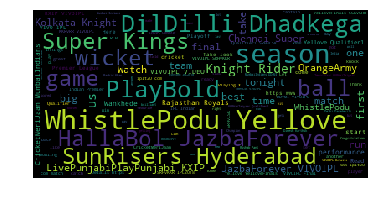

In [119]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import *

name = "IPL"
fname = "FB.jsonl".format(name)

all_posts = []
with open(fname) as f:
    for line in f:
        post = json.loads(line)
        all_posts.append(post.get('message', ''))
text = ' '.join(all_posts)
stop_list = ['save', 'free', 'today', 'get', 'title', 'titles', 'bit', 'ly']
stop_list.extend(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_list).generate(text)
plt.imshow(wordcloud)
plt.axis("off")